Training With Eta = 0.035
Error after 0 iterations: 0.329098763024
Error after 10000 iterations: 0.0371517586236
Error after 20000 iterations: 0.033665460055
Error after 30000 iterations: 0.0334104426883


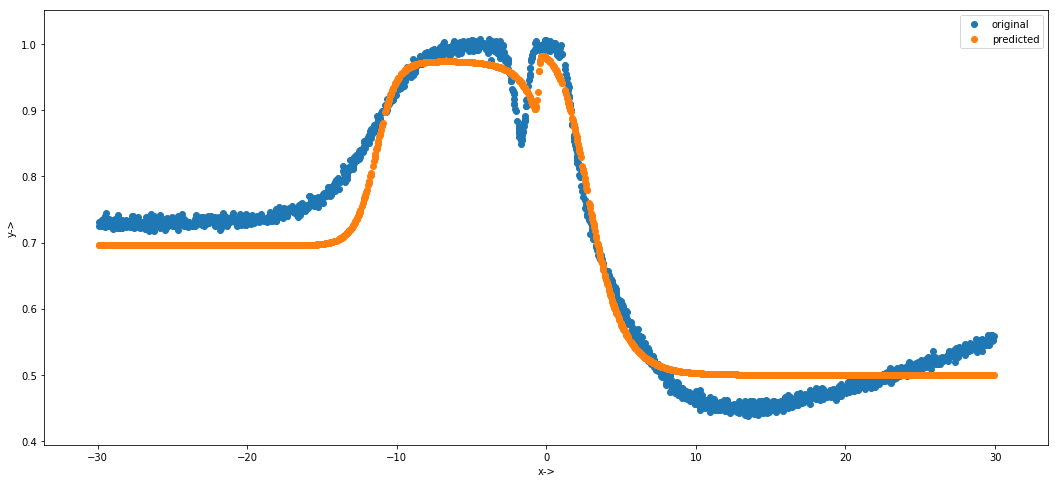

In [17]:
import numpy as np
import scipy.io as spio
import matplotlib.pyplot as plt


# compute sigmoid nonlinearity
def sigmoid(x):
    output = 1/(1+np.exp(-x))
    return output

# convert output of sigmoid function to its derivative
def sigmoid_derivative(output):
    return output*(1-output)

mat = spio.loadmat('hw2data_2.mat', squeeze_me=True)    

X_1 = mat['X']
y = mat['Y']
n = X_1.shape[0]    # n = 2000
k = 3               # number of neurons in first layer
eta = 0.035         # learning rate

X = np.zeros([n,2])

# lift the input space by 1
for i in range(len(X_1)):
    X[i,1]=X_1[i]
    X[i,0]=1

Y = np.zeros([n,1])

for i in range(n):
    Y[i,0]=y[i]
    
y = Y

print ("Training With Eta = " + str(eta))
np.random.seed(1)

# randomly initialize our weights to be uniform on [-1,1]
W_1 = 2*np.random.random((2,k)) - 1   # W_1[:,0] = b_1 
W_2 = 2*np.random.random((k,1)) - 1

for j in range(40000):

    # Feed forward through layers 0, 1, and 2
    layer_0 = X
    layer_1 = sigmoid(np.dot(layer_0,W_1))
    layer_2 = sigmoid(np.dot(layer_1,W_2))
    
    # how much did we miss the target value?
    layer_2_error = layer_2 - y

    if (j % 10000) == 0:
        print ("Error after "+ str(j) +" iterations: " + str(np.mean(np.abs(layer_2_error))))

    # in what direction is the target value?
    # were we really sure? if so, don't change too much
    layer_2_delta = layer_2_error*sigmoid_derivative(layer_2)

    # how much did each l1 value contribute to the l2 error (according to the weights)?
    layer_1_error = layer_2_delta.dot(W_2.T)

    # in what direction is the target l1?
    # were we really sure? if so, don't change too much.
    layer_1_delta = layer_1_error * sigmoid_derivative(layer_1)

    W_2 -= eta * (layer_1.T.dot(layer_2_delta))
    W_1 -= eta * (layer_0.T.dot(layer_1_delta))

    
layer_0 = X
layer_1 = sigmoid(np.dot(layer_0,W_1))
layer_2 = sigmoid(np.dot(layer_1,W_2))

plt.scatter(X[:,1],y,label="original")
plt.scatter(X[:,1],layer_2,label="predicted")
plt.xlabel("x->")
plt.ylabel("y->")
plt.gcf().set_size_inches(18,8)
plt.legend()
plt.show()

